<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              536 non-null    float64
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB
Number of duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

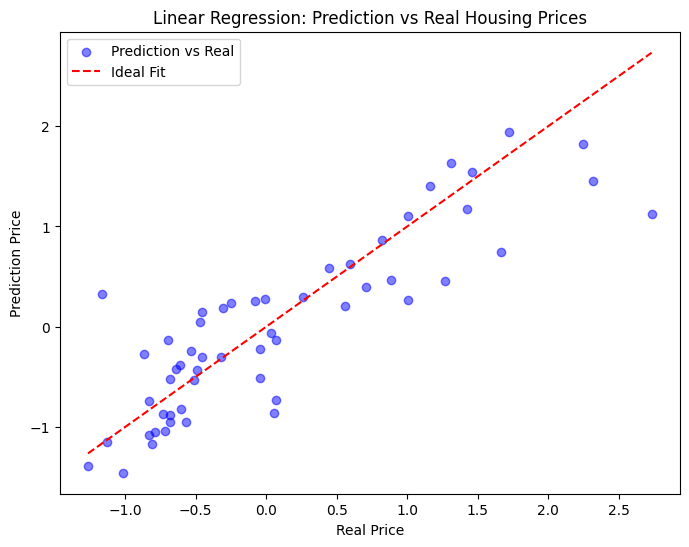


Logistic Regression Evaluation:
Accuracy: 0.84
Confusion Matrix:
[[24  4]
 [ 5 22]]


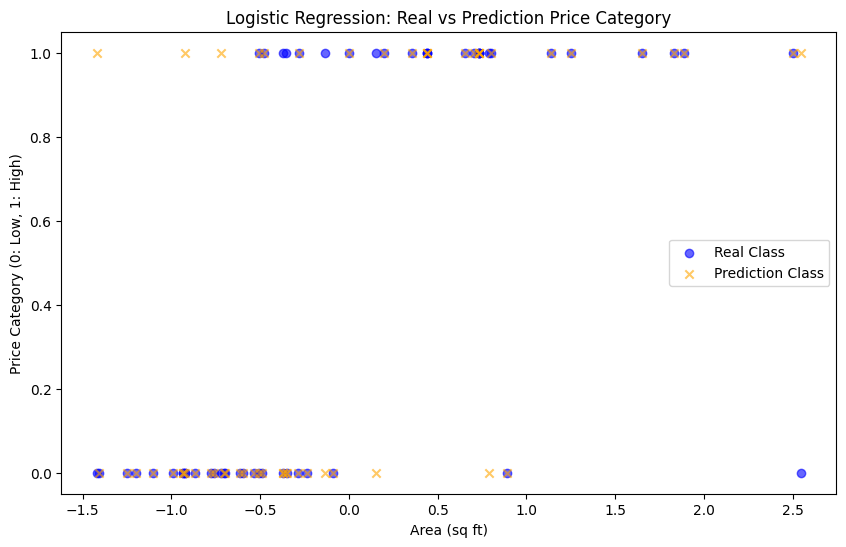

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.impute import SimpleImputer

# Preprocessed Data from Assignment-04
housePriDt = pd.read_csv('Housing Price.csv')
housePriDt.head(100)


housePriDt.shape
housePriDt.info()

#  Handle Missing Values
housePriDt.isnull().sum()

#  Remove Duplicate Rows
housePriDt.drop_duplicates(inplace=True)
print(f"Number of duplicate rows: {housePriDt.duplicated().sum()}")
numaricCol = housePriDt.select_dtypes(include=[np.number]).columns
intrprt = SimpleImputer(strategy='mean')
housePriDt[numaricCol] = intrprt.fit_transform(housePriDt[numaricCol])

# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
lblEncdr = LabelEncoder()
housePriDt['mainroad'] = lblEncdr.fit_transform(housePriDt['mainroad'])
housePriDt['guestroom'] = lblEncdr.fit_transform(housePriDt['guestroom'])
housePriDt['basement'] = lblEncdr.fit_transform(housePriDt['basement'])
housePriDt['hotwaterheating'] = lblEncdr.fit_transform(housePriDt['hotwaterheating'])
housePriDt['airconditioning'] = lblEncdr.fit_transform(housePriDt['airconditioning'])
housePriDt['prefarea'] = lblEncdr.fit_transform(housePriDt['prefarea'])
housePriDt['furnishingstatus'] = lblEncdr.fit_transform(housePriDt['furnishingstatus'])
housePriDt.info()

# Scale Numeric Features
excldClm = ['area']
nmrcFtr = housePriDt.select_dtypes(include=[np.number]).columns.difference(excldClm)
sclr = StandardScaler()
housePriDt[nmrcFtr] = sclr.fit_transform(housePriDt[nmrcFtr])
print("\nNumeric features have been scaled.")

# Feature Selection Based on Correlation
nmrclClmz = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
sclr = StandardScaler()
housePriDt[nmrclClmz] = sclr.fit_transform(housePriDt[nmrclClmz])
print(housePriDt[nmrclClmz].head())
crltn = housePriDt.corr(method='pearson')
print(crltn['bathrooms'].sort_values(ascending=False).to_string())

# Linear Regression
hpX = housePriDt.drop(columns=['price'])
hpY = housePriDt['price']
x_line, X_test, y_line, y_test = train_test_split(hpX, hpY, test_size=0.1, random_state=32)

linear_model = LinearRegression()
linear_model.fit(x_line, y_line)
yPLnr = linear_model.predict(X_test)
meanSqrEr = mean_squared_error(y_test, yPLnr)
rmeanSqrEr = np.sqrt(meanSqrEr)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, yPLnr, alpha=0.5, label='Prediction vs Real', color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Real Price')
plt.ylabel('Prediction Price')
plt.title('Linear Regression: Prediction vs Real Housing Prices')
plt.legend()
plt.show()


# Logistic Regression
housePrV = housePriDt['price'].median()
housePriDt['Price_Category'] = (housePriDt['price'] > housePrV).astype(int)
tst1 = housePriDt.drop(columns=['price', 'Price_Category'])
tst2 = housePriDt['Price_Category']
xLine2, xtst2, yLine2, ytst2 = train_test_split(tst1, tst2, test_size=0.1, random_state=32)
log_model = LogisticRegression()
log_model.fit(xLine2, yLine2)
yPredL = log_model.predict(xtst2)
accur2 = accuracy_score(ytst2, yPredL)
confusionMatrxLg = confusion_matrix(ytst2, yPredL)
print("\nLogistic Regression Evaluation:")
print(f"Accuracy: {accur2:.2f}")
print(f"Confusion Matrix:\n{confusionMatrxLg}")

plt.figure(figsize=(10, 6))
plt.scatter(xtst2['area'], ytst2, color='blue', alpha=0.6, label='Real Class')
plt.scatter(xtst2['area'], yPredL, color='orange', alpha=0.6, marker='x', label='Prediction Class')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price Category (0: Low, 1: High)')
plt.title('Logistic Regression: Real vs Prediction Price Category')
plt.legend()
plt.show()